# Part 5

## Google Collab mounting

In [0]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)


In [0]:
%cd drive/"My Drive"/ECSE-415-Project/Submission

In [43]:
import random
import itertools
import warnings
import pickle

!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
import cv2
import pandas as pd
import numpy as np



import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker


from skimage.feature import local_binary_pattern
from sklearn import decomposition
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix



In [44]:
!pip freeze

absl-py==0.8.1
alabaster==0.7.12
albumentations==0.1.12
altair==3.2.0
astor==0.8.0
astropy==3.0.5
atari-py==0.2.6
atomicwrites==1.3.0
attrs==19.3.0
audioread==2.1.8
autograd==1.3
Babel==2.7.0
backcall==0.1.0
backports.tempfile==1.0
backports.weakref==1.0.post1
beautifulsoup4==4.6.3
bleach==3.1.0
blis==0.2.4
bokeh==1.0.4
boto==2.49.0
boto3==1.10.18
botocore==1.13.18
Bottleneck==1.3.0
branca==0.3.1
bs4==0.0.1
bz2file==0.98
cachetools==3.1.1
certifi==2019.9.11
cffi==1.13.2
chainer==6.5.0
chardet==3.0.4
chart-studio==1.0.0
Click==7.0
cloudpickle==1.2.2
cmake==3.12.0
colorlover==0.3.0
community==1.0.0b1
contextlib2==0.5.5
convertdate==2.2.0
coverage==3.7.1
coveralls==0.5
crcmod==1.7
cufflinks==0.17.0
cvxopt==1.2.3
cvxpy==1.0.25
cycler==0.10.0
cymem==2.0.3
Cython==0.29.14
daft==0.0.4
dask==1.1.5
dataclasses==0.7
datascience==0.10.6
decorator==4.4.1
defusedxml==0.6.0
descartes==1.1.0
dill==0.3.1.1
distributed==1.25.3
Django==2.2.7
dlib==19.18.0
dm-sonnet==1.35
docopt==0.6.2
docutils==0.15.2
d

## Library imports

In [0]:
!pip install opencv-python==3.4.2.16
!pip install opencv-contrib-python==3.4.2.16
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## Dataset Extraction

In [0]:
train_x = np.asarray(pd.read_csv("train_x.csv",header=None))
train_x = train_x.reshape(-1,256,256,3)

test_x = np.asarray(pd.read_csv("test_x.csv",header=None))
test_x = test_x.reshape(-1,256,256,3)

train_y = np.asarray(pd.read_csv("train_y.csv",header=None))
test_y = np.asarray(pd.read_csv("test_y.csv",header=None))

In [0]:
def preprocess(img, pad=0):
  img = img.astype("uint8")
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  return img

In [0]:
train_x_preprocessed = [preprocess(img,pad=0) for img in train_x]
test_x_preprocessed = [preprocess(img,pad=0) for img in test_x]


## PCA in greyscale

In [0]:
#PCA
def eigenfaces(imgData):
  imgData = imgData.reshape(imgData.shape[0],-1)
  pca = PCA(n_components=imgData.shape[0]).fit(imgData)

  eigenfaces = pca.components_

  return eigenfaces

(75, 65536)
(70, 65536)


Text(0.5, 0.98, 'Eigenfaces in greyscale')

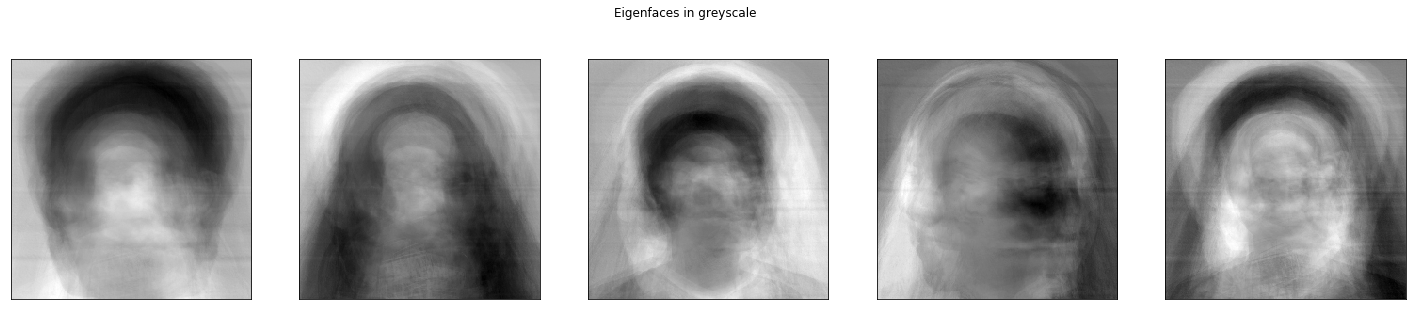

In [0]:
x_train = eigenfaces(np.array(train_x_preprocessed))
x_test = eigenfaces(np.array(test_x_preprocessed))

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(25,5))
ax = ax.ravel()
for i in range(5):
  img = (x_train[i])
  img = img.reshape(256,256)
  ax[i].imshow(img,cmap='gray')
  ax[i].set_xticks([]),ax[i].set_yticks([])

fig.suptitle("Eigenfaces in greyscale")


In [0]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, train_y)
pred = neigh.predict(x_test) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.37142857142857144
[[11  4  5  2  2]
 [ 3  6  2  3  4]
 [ 0  3  3  2  5]
 [ 0  0  2  5  2]
 [ 0  1  2  2  1]]


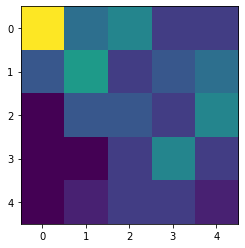

In [0]:
print(accuracy_score(pred,test_y))
print(confusion_matrix(pred,test_y))
plt.imshow(confusion_matrix(pred,test_y))

## PCA using color

(75, 196608)
(70, 196608)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 0.98, 'Eigenfaces in color')

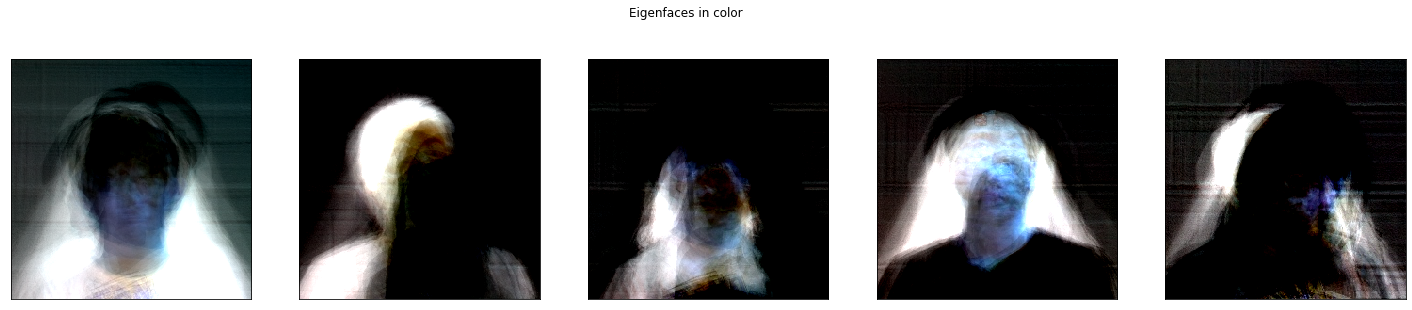

In [0]:
x_train = eigenfaces(train_x )
x_test = eigenfaces(test_x )

fig, ax = plt.subplots(nrows=1,ncols=5,figsize=(25,5))
ax = ax.ravel()
for i in range(5):
  img = (x_test[i]*255)#.astype('uint8')
  img = img.reshape(256,256,3)
  #img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  ax[i].imshow(img)
  ax[i].set_xticks([]),ax[i].set_yticks([])

fig.suptitle("Eigenfaces in color")

In [0]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train, train_y)
pred = neigh.predict(x_test) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


0.38571428571428573
[[12  6  7  2  5]
 [ 2  5  1  4  1]
 [ 0  2  3  3  4]
 [ 0  1  2  5  2]
 [ 0  0  1  0  2]]


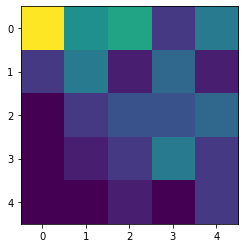

In [0]:
print(accuracy_score(pred,test_y))
print(confusion_matrix(pred,test_y))
plt.imshow(confusion_matrix(pred,test_y))

# Part 6

In [0]:
def labelMapping(label):
  if label == 0:
    return 'Elsa'
  elif label == 1:
    return 'Jenisha'
  elif label == 2:
    return 'Kevin'
  elif label == 3:
    return 'Tooba'
  elif label == 4:
    return 'Tri-tin'
  else:
    return 'Not found'

In [0]:
haar_cascade_face = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

def bounding_boxes(img, scale_factor = 1.1, min_neighbors=3):
  """
  Defines a bounding box around an image

  img: RBG image in an Numpy matrix
  scale_factor: Used for haar_cascade_face.detectMultiScale, defaults to 1
  min_neighbors: Used for haar_cascade_face.detectMultiScale, default to 5

  Returns rectangular defined by (x,y,w,h)

  """
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  #Detect face
  faces_rects = haar_cascade_face.detectMultiScale(gray,scale_factor,min_neighbors)

  if len(faces_rects) > 0:
    return faces_rects#[0] #(x, y, w, h)
  else:
    return 0,0,img.shape[0],img.shape[1]


In [0]:
true_label_group = [2,4,3,1,0]
offset=100

(256, 768)
(256, 768)
(256, 768)
(256, 768)
(256, 768)


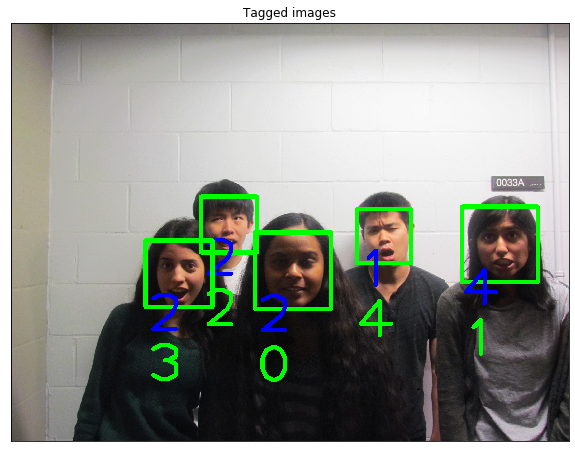

In [0]:
im_test_path = "Images/Group_pic_1.JPG"
im_test = cv2.imread(im_test_path)
bb = bounding_boxes(im_test)

im_disp = im_test.copy()
bb_y = [y for (x,y,w,h) in bb]
bb_y_median = np.median(bb_y)
bb_y_std = np.std(bb_y)
if bb_y_std > 150:
  bb = [(x,y,w,h) for (x,y,w,h) in bb if np.abs(y-bb_y_median) < bb_y_std ]

plt.figure(figsize=(10,10))
for i,(x,y,w,h) in enumerate(bb):
  im_disp = cv2.rectangle(im_disp,(x,y),(x+w,y+h),(0, 255, 0), 15)
  
  roi = im_test[y:y+h, x:x+w,:]
  roi_test = cv2.resize(roi,(256,256))
  roi_eigen = eigenfaces(roi_test).reshape(1,-1)
  pred = neigh.predict(roi_eigen)
  pred_label = str(int(pred[0]))
  true_label = str(true_label_group[i])
  im_disp = cv2.putText(im_disp,pred_label, (x,y+h+offset ),cv2.FONT_HERSHEY_PLAIN,15,(255, 0, 0), 15)
  im_disp = cv2.putText(im_disp,true_label, (x,y+h+3*offset ),cv2.FONT_HERSHEY_PLAIN,15,(0, 255, 0), 15)
  plt.imshow( cv2.cvtColor(im_disp, cv2.COLOR_BGR2RGB))

plt.title('Tagged images'), plt.xticks([]), plt.yticks([])
  
plt.show()

(256, 768)
(256, 768)
(256, 768)
(256, 768)
(256, 768)


(Text(0.5, 1.0, 'Tagged images'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

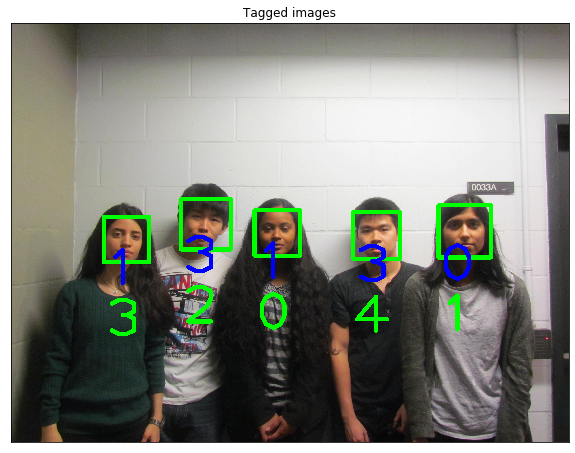

In [0]:
im_test_path = "Images/Group_pic_2.JPG"
true_label_group = [2,0,1,3,4]
im_test = cv2.imread(im_test_path)
bb = bounding_boxes(im_test)

im_disp = im_test.copy()
bb_y = [y for (x,y,w,h) in bb]
bb_y_median = np.median(bb_y)
bb_y_std = np.std(bb_y)
if bb_y_std > 150:
  bb = [(x,y,w,h) for (x,y,w,h) in bb if np.abs(y-bb_y_median) < bb_y_std ]

plt.figure(figsize=(10,10))
for i,(x,y,w,h) in enumerate(bb[0:-1]):
  im_disp = cv2.rectangle(im_disp,(x,y),(x+w,y+h),(0, 255, 0), 15)
  
  roi = im_test[y:y+h, x:x+w,:]
  roi_test = cv2.resize(roi,(256,256))
  roi_eigen = eigenfaces(roi_test).reshape(1,-1)
  pred = neigh.predict(roi_eigen)
  pred_label = str(int(pred[0]))
  true_label = str(true_label_group[i])
  im_disp = cv2.putText(im_disp,pred_label, (x,y+h+offset ),cv2.FONT_HERSHEY_PLAIN,15,(255, 0, 0), 15)
  im_disp = cv2.putText(im_disp,true_label, (x,y+h+3*offset ),cv2.FONT_HERSHEY_PLAIN,15,(0, 255, 0), 15)
  plt.imshow( cv2.cvtColor(im_disp, cv2.COLOR_BGR2RGB))

plt.title('Tagged images'), plt.xticks([]), plt.yticks([])

(256, 768)
(256, 768)
(256, 768)
(256, 768)
(256, 768)


(Text(0.5, 1.0, 'Tagged images'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

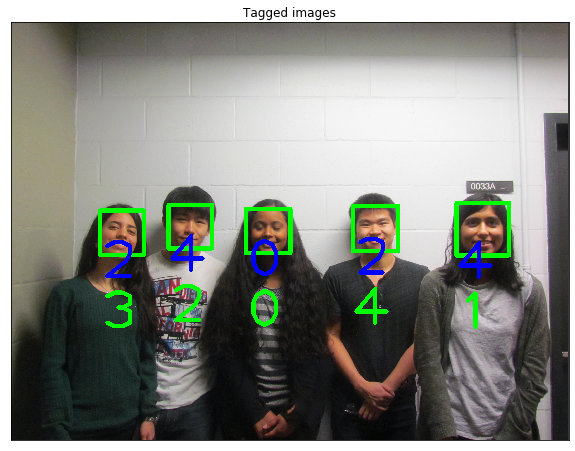

In [0]:
im_test_path = "Images/Group_pic_4.JPG"
true_label_group = [2,4,1,0,3]
im_test = cv2.imread(im_test_path)
bb = bounding_boxes(im_test)

im_disp = im_test.copy()
bb_y = [y for (x,y,w,h) in bb]
bb_y_median = np.median(bb_y)
bb_y_std = np.std(bb_y)
if bb_y_std > 150:
  bb = [(x,y,w,h) for (x,y,w,h) in bb if np.abs(y-bb_y_median) < bb_y_std ]

plt.figure(figsize=(10,10))
for i,(x,y,w,h) in enumerate(bb):
  im_disp = cv2.rectangle(im_disp,(x,y),(x+w,y+h),(0, 255, 0), 15)
  
  roi = im_test[y:y+h, x:x+w,:]
  roi_test = cv2.resize(roi,(256,256))
  roi_eigen = eigenfaces(roi_test).reshape(1,-1)
  pred = neigh.predict(roi_eigen)
  pred_label = str(int(pred[0]))
  true_label = str(true_label_group[i])
  im_disp = cv2.putText(im_disp,pred_label, (x,y+h+offset ),cv2.FONT_HERSHEY_PLAIN,15,(255, 0, 0), 15)
  im_disp = cv2.putText(im_disp,true_label, (x,y+h+3*offset ),cv2.FONT_HERSHEY_PLAIN,15,(0, 255, 0), 15)
  plt.imshow( cv2.cvtColor(im_disp, cv2.COLOR_BGR2RGB))

plt.title('Tagged images'), plt.xticks([]), plt.yticks([])

(256, 768)
(256, 768)
(256, 768)
(256, 768)


(Text(0.5, 1.0, 'Tagged images'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

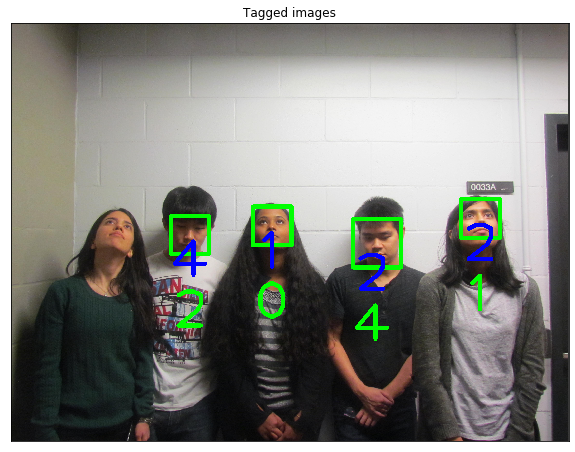

In [0]:
im_test_path = "Images/Group_pic_5.JPG"
true_label_group = [1,0,2,4]
im_test = cv2.imread(im_test_path)
bb = bounding_boxes(im_test)

im_disp = im_test.copy()
bb_y = [y for (x,y,w,h) in bb]
bb_y_median = np.median(bb_y)
bb_y_std = np.std(bb_y)
if bb_y_std > 150:
  bb = [(x,y,w,h) for (x,y,w,h) in bb if np.abs(y-bb_y_median) < bb_y_std ]

plt.figure(figsize=(10,10))
for i,(x,y,w,h) in enumerate(bb):
  im_disp = cv2.rectangle(im_disp,(x,y),(x+w,y+h),(0, 255, 0), 15)
  
  roi = im_test[y:y+h, x:x+w,:]
  roi_test = cv2.resize(roi,(256,256))
  roi_eigen = eigenfaces(roi_test).reshape(1,-1)
  pred = neigh.predict(roi_eigen)
  pred_label = str(int(pred[0]))
  true_label = str(true_label_group[i])
  im_disp = cv2.putText(im_disp,pred_label, (x,y+h+offset ),cv2.FONT_HERSHEY_PLAIN,15,(255, 0, 0), 15)
  im_disp = cv2.putText(im_disp,true_label, (x,y+h+3*offset ),cv2.FONT_HERSHEY_PLAIN,15,(0, 255, 0), 15)
  plt.imshow( cv2.cvtColor(im_disp, cv2.COLOR_BGR2RGB))

plt.title('Tagged images'), plt.xticks([]), plt.yticks([])

(256, 768)
(256, 768)
(256, 768)
(256, 768)
(256, 768)


(Text(0.5, 1.0, 'Tagged images'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

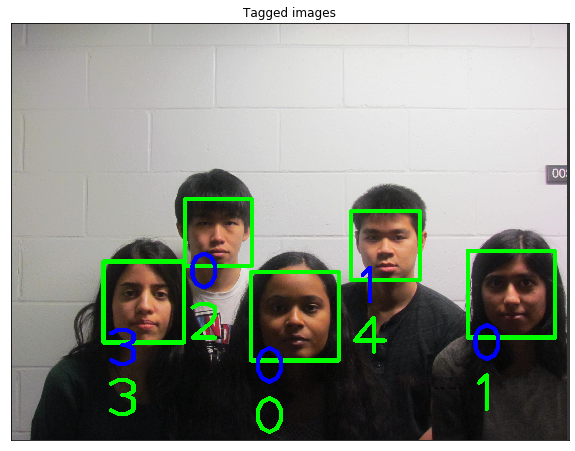

In [0]:
im_test_path = "Images/Group_pic_6.JPG"
true_label_group = [2,4,1,3,0]
im_test = cv2.imread(im_test_path)
bb = bounding_boxes(im_test)

im_disp = im_test.copy()
bb_y = [y for (x,y,w,h) in bb]
bb_y_median = np.median(bb_y)
bb_y_std = np.std(bb_y)
if bb_y_std > 150:
  bb = [(x,y,w,h) for (x,y,w,h) in bb if np.abs(y-bb_y_median) < bb_y_std ]

plt.figure(figsize=(10,10))
for i,(x,y,w,h) in enumerate(bb):
  im_disp = cv2.rectangle(im_disp,(x,y),(x+w,y+h),(0, 255, 0), 15)
  
  roi = im_test[y:y+h, x:x+w,:]
  roi_test = cv2.resize(roi,(256,256))
  roi_eigen = eigenfaces(roi_test).reshape(1,-1)
  pred = neigh.predict(roi_eigen)
  pred_label = str(int(pred[0]))
  true_label = str(true_label_group[i])
  im_disp = cv2.putText(im_disp,pred_label, (x,y+h+offset ),cv2.FONT_HERSHEY_PLAIN,15,(255, 0, 0), 15)
  im_disp = cv2.putText(im_disp,true_label, (x,y+h+3*offset ),cv2.FONT_HERSHEY_PLAIN,15,(0, 255, 0), 15)
  plt.imshow( cv2.cvtColor(im_disp, cv2.COLOR_BGR2RGB))

plt.title('Tagged images'), plt.xticks([]), plt.yticks([])